In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
name = None

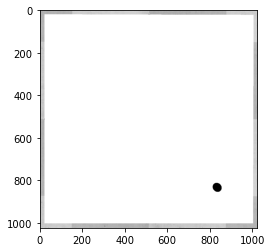

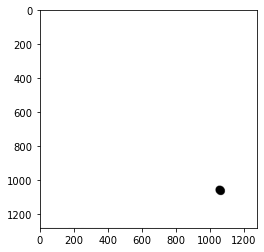

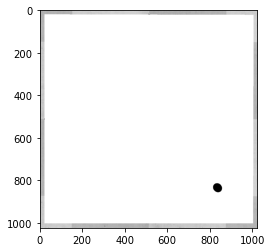

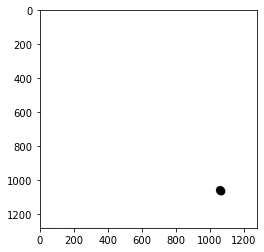

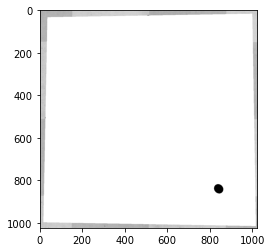

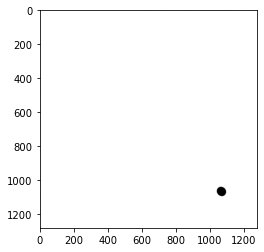

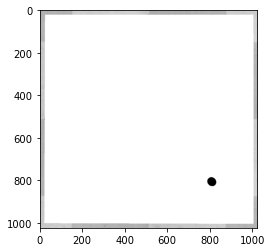

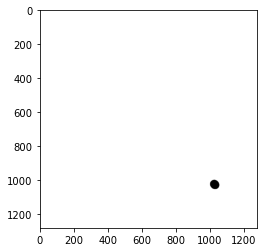

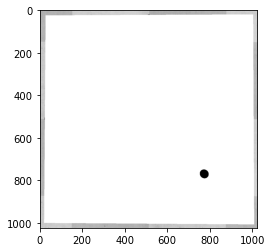

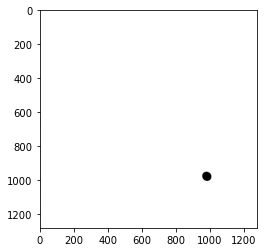

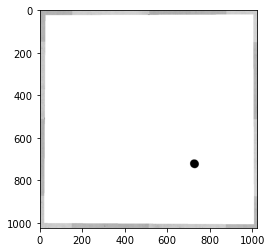

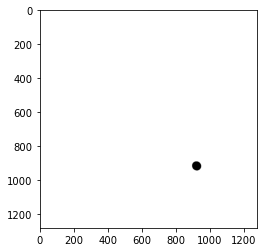

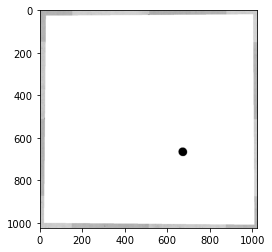

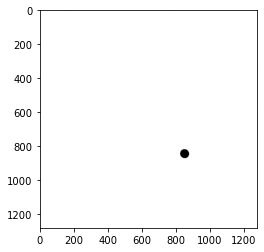

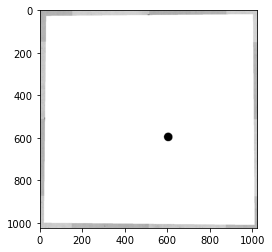

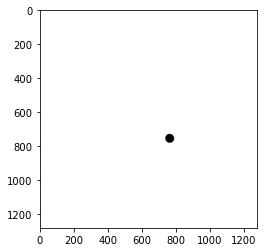

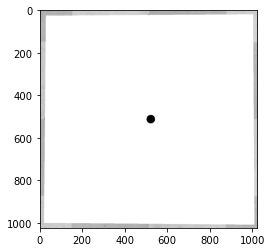

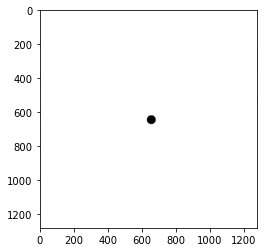

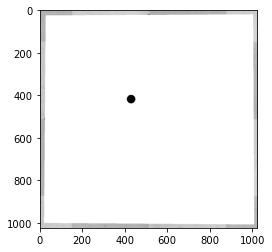

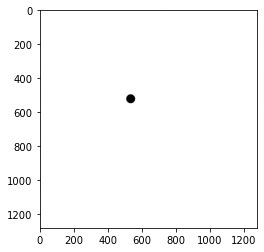

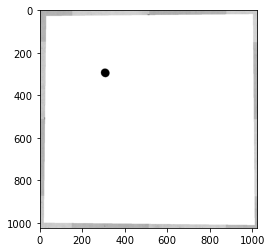

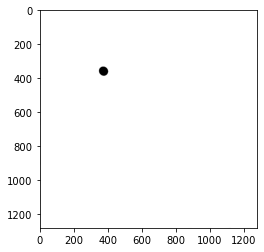

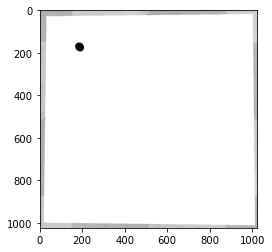

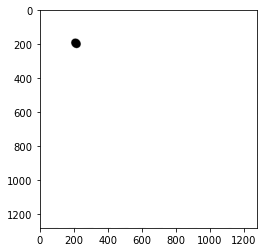

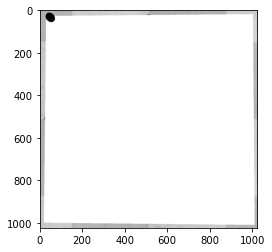

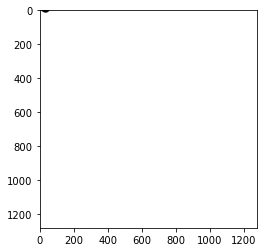

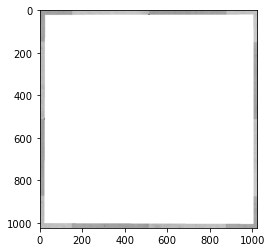

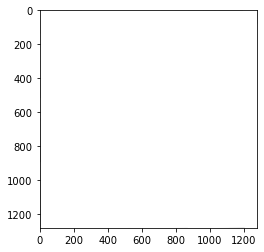

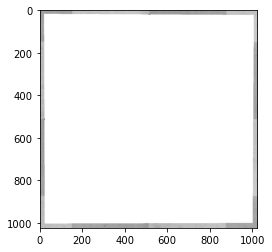

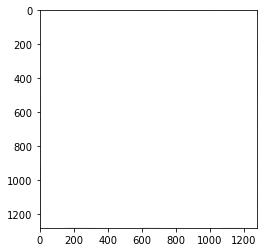

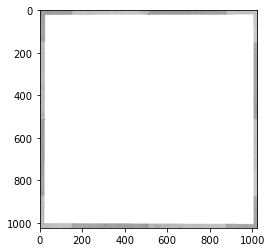

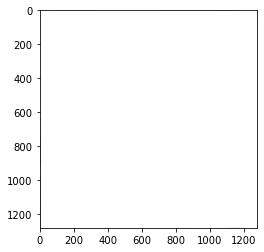

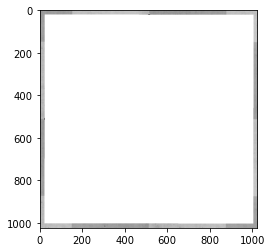

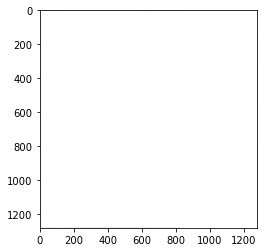

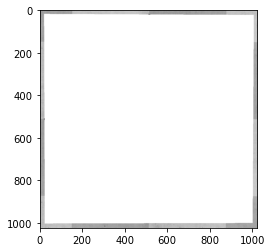

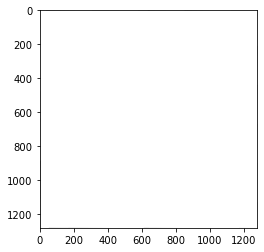

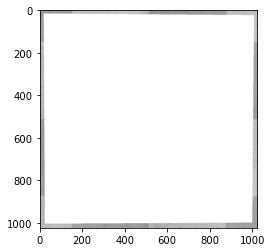

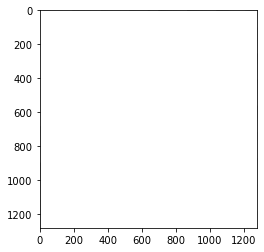

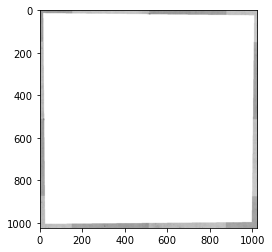

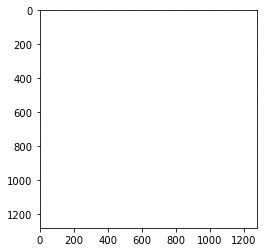

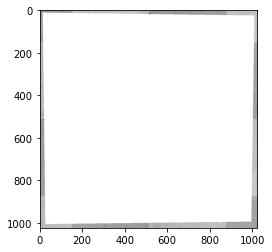

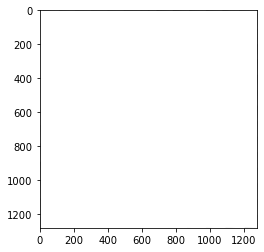

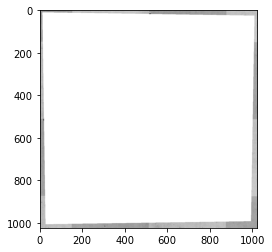

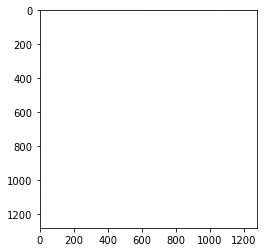

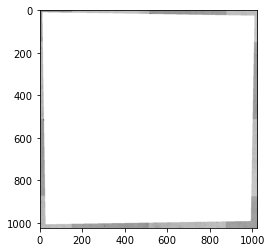

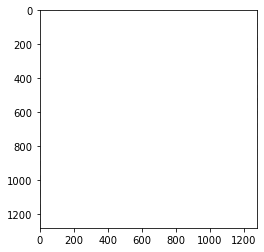

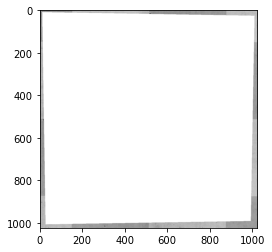

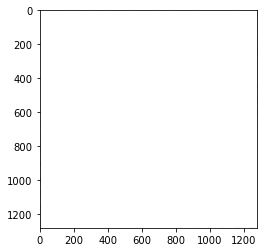

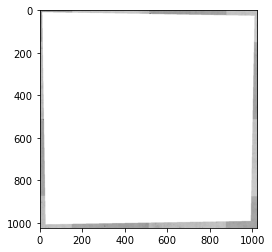

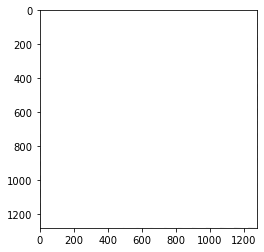

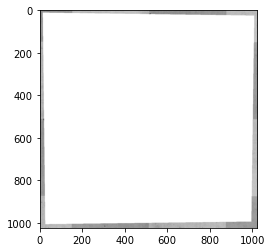

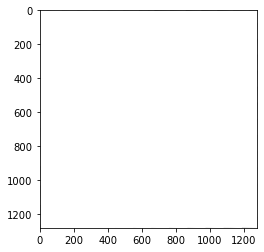

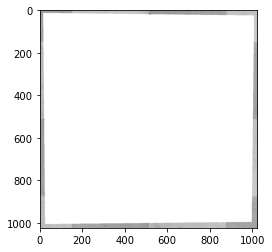

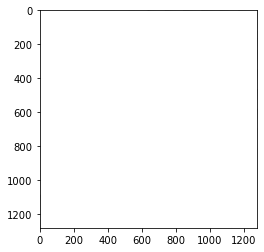

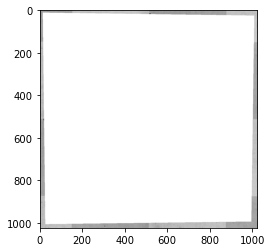

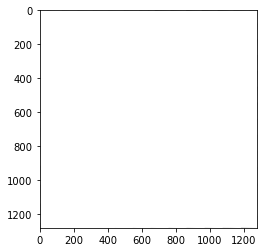

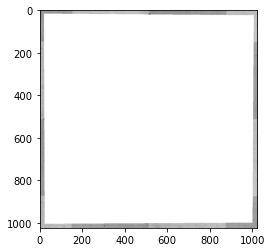

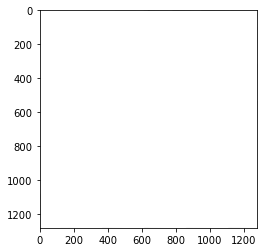

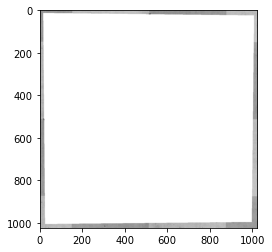

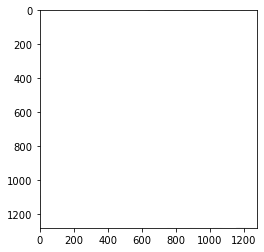

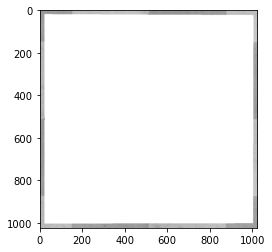

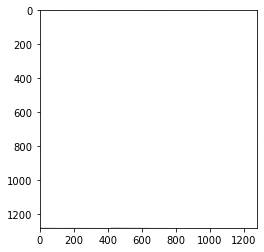

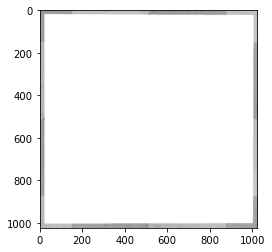

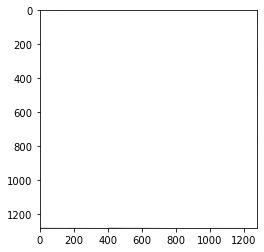

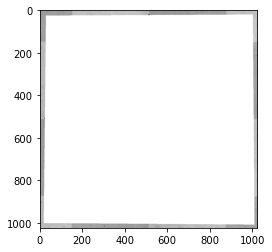

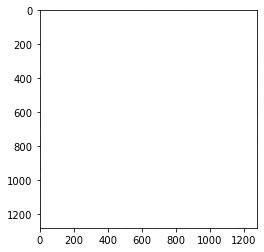

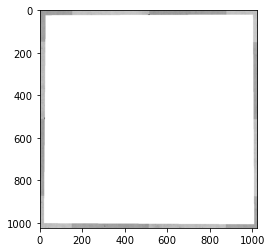

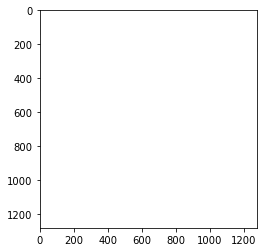

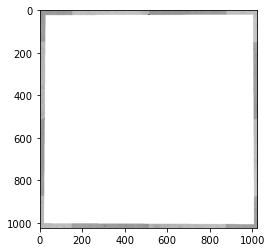

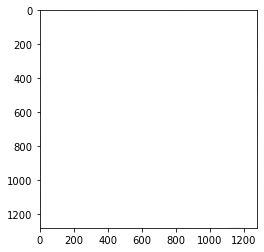

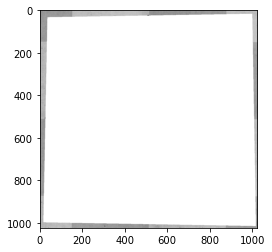

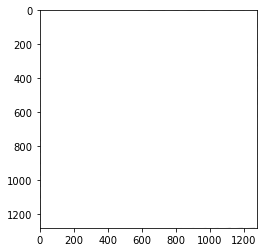

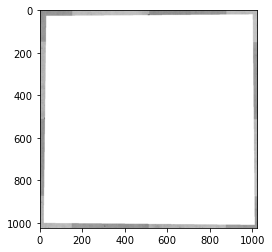

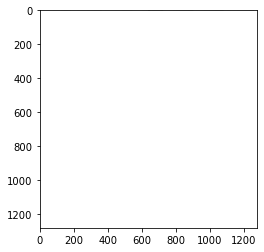

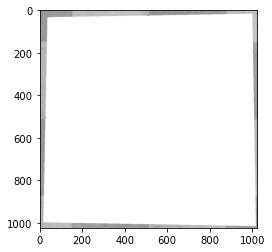

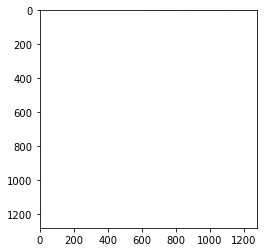

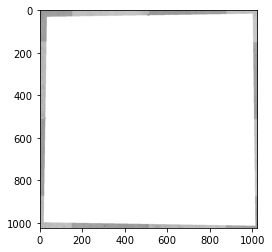

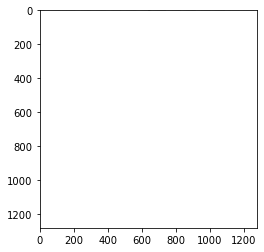

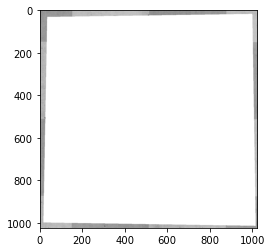

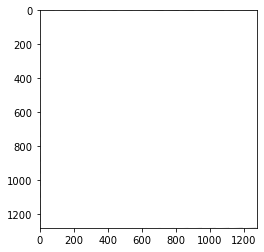

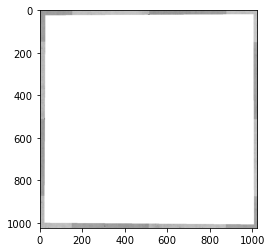

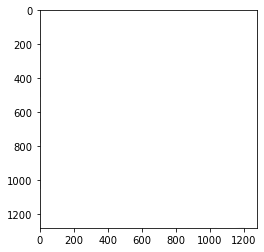

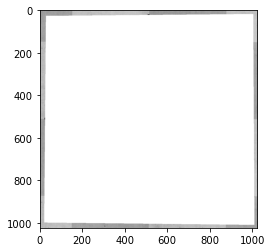

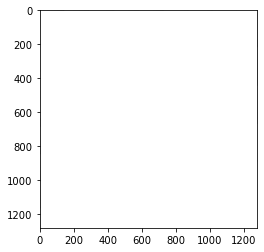

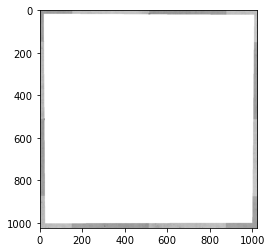

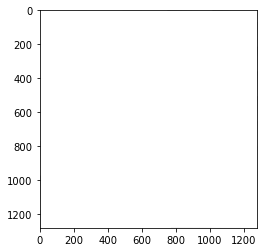

In [11]:
#time
for i in range(1,44):
    name = str(i) +".png"
    img = cv.imread(name,0)
    plt.imshow(img,cmap='gray')
    plt.show()
    gray = cv.GaussianBlur(img, (5,5), 2)
	
	

    ret,thresh1 = cv.threshold(gray,230,255,cv.THRESH_BINARY_INV)
	#Applying Canny Edge Detection
    #edged = cv.Canny(thresh1, 50, 200)
	
	#Applying Canny Edge Detection
    edged = cv.Canny(thresh1, 50, 200)
	

					



	#Finding Contours 
    cnts = cv.findContours(edged.copy(), cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)[0]
		


	#Sorting the Contours in decreasing order because Square containing the Maze is largest
    cnts = sorted(cnts, key = cv.contourArea, reverse = True)
    for c in cnts:
        peri = cv.arcLength(c, True)
        approx = cv.approxPolyDP(c, 0.05 * peri, True)
        #0.02
		
	# If length is 4 then it is ROI
        if len(approx) == 4:
            screenCnt = approx
            break
    pts = screenCnt.reshape(4, 2)

	#creating Array of Zero of Size(4,2)	
    rect = np.zeros((4, 2), dtype = "float32")
    s = pts.sum(axis = 1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]

    diff = np.diff(pts, axis = 1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]
    (tl, tr, br, bl) = rect
    maxWidth = 1280



	#Findinf Maximum height

	
    maxHeight = 1280

	#Destination Array of ROI
	

    dst = np.array([[0, 0],[maxWidth - 1, 0],[maxWidth - 1, maxHeight - 1],[0, maxHeight - 1]], dtype = "float32")


	#Applying perspective transform
    M = cv.getPerspectiveTransform(rect, dst)

	# Finally the warped image 
    warped_img = cv.warpPerspective(img, M, (maxWidth, maxHeight))
    plt.imshow(warped_img,cmap='gray')
    plt.show()



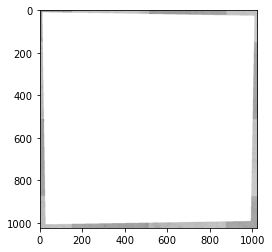

---real image--------------


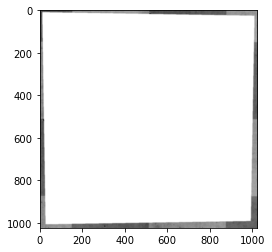

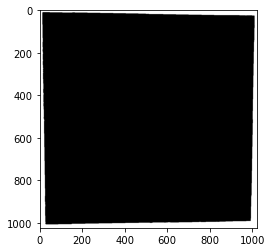

------thresh ----------


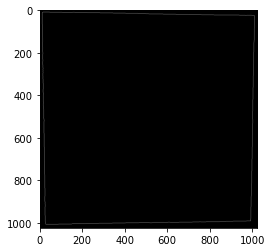

-----------canny ------
2


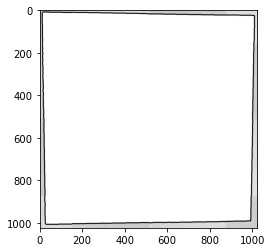

-------draw contours---------
firiririr
4
here
points[[  12   10]
 [  25 1004]
 [ 989  990]
 [1007   26]]
[[  12.   10.]
 [1007.   26.]
 [ 989.  990.]
 [  25. 1004.]]
Wall time: 2.55 s


In [5]:
'''%%time
img = cv.imread("31.png",0)
plt.imshow(img,cmap='gray')

plt.show()
print("---real image--------------")
gray = cv.GaussianBlur(img, (5,5), 2)
plt.imshow(gray,cmap='gray')

plt.show()

ret,thresh1 = cv.threshold(gray,230,255,cv.THRESH_BINARY_INV)
plt.imshow(thresh1,cmap='gray')

plt.show()
print("------thresh ----------")
	#Applying Canny Edge Detection
edged = cv.Canny(thresh1, 50, 200)
plt.imshow(edged,cmap='gray')

plt.show()
print("-----------canny ------")
	

					



	#Finding Contours 
cnts = cv.findContours(edged,cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)[0]
print(len(cnts))
lala= cv.drawContours(img,cnts,-1, (0,255,0), 3)
plt.imshow(lala,cmap='gray')

plt.show()
print("-------draw contours---------")
		



	#Sorting the Contours in decreasing order because Square containing the Maze is largest
cnts = sorted(cnts, key = cv.contourArea, reverse = True)

for c in cnts:
        peri = cv.arcLength(c, True)
        approx = cv.approxPolyDP(c, 0.1* peri, True)
        print("firiririr")
        print(len(approx))
        #0.02
		
	# If length is 4 then it is ROI
        if len(approx) == 4:
            print("here")
            screenCnt = approx
            break

pts = screenCnt.reshape(4, 2)
print(f"points{pts}")

	#creating Array of Zero of Size(4,2)	
rect = np.zeros((4, 2), dtype = "float32")
s = pts.sum(axis = 1)
rect[0] = pts[np.argmin(s)]
rect[2] = pts[np.argmax(s)]

diff = np.diff(pts, axis = 1)
rect[1] = pts[np.argmin(diff)]
rect[3] = pts[np.argmax(diff)]
(tl, tr, br, bl) = rect
print(rect)


	#Destination Array of ROI
	

dst = np.array([[0, 0],[1280, 0],[1280,1280],[0,1280]], dtype = "float32")


	#Applying perspective transform
M = cv.getPerspectiveTransform(rect, dst)

	# Finally the warped image 
warped_img = cv.warpPerspective(img, M, (1297,1279))




    

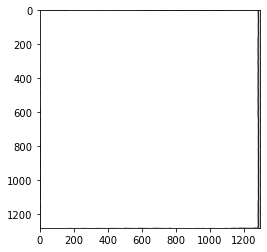

Wall time: 575 ms


In [6]:
%%time
plt.imshow(warped_img,cmap='gray')
cv.imwrite("perspec.png",warped_img)
plt.show()

In [23]:
print(warped_img.shape)

(1279, 1297)
